# Examen 1 - Portafolios de inversión - O2018. Tipo 3.

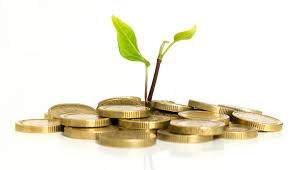

**Resumen.**
> Este examen pretende evaluar los conocimientos que hemos adquirido a lo largo de los dos primeros módulos.

> El examen consta de dos partes. 
1. La primera es meramente teórica, y los cálculos que puede llegar a involucrar son bastante sencillos. En esta parte, las preguntas son de selección múltiple con justificación, es decir, debes elegir la(s) respuesta(s) correcta(s) y decir porqué la seleccionaste.
2. La segunda parte es práctica, como lo que se ha venido haciendo en las tareas. En esta parte deberás importar un archivo donde se encuentran reportados los precios ajustados en el cierre de dos compañías en una base diaria, deberás caracterizar los rendimientos y con base en ello construir fronteras media-varianza bajo ciertas condiciones. Finalmente deberás concluir de los resultados.

**Criterio de revisión.**
> Primera parte: tiene un valor del 50% del examen. Cada pregunta tiene un valor del 10%, de los cuales 4% corresponde a la selección y el otro 6% corresponde a la justificación. Si la pregunta corresponde a un cálculo numérico, la justificación es en sí las operaciones resueltas para obtener el resultado en el notebook.

> Segunda parte: tiene un valor del 50% del examen. Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, nombrar este archivo *Examen1_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Examen1_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir a moodle.
___

In [37]:
import pandas as pd
import numpy as np
import scipy.optimize as opt

## I. Primera parte (50%)

**Pregunta 1.** Considere la siguiente distribución de rendimientos de los activos A, B y C:

| Probabilidad     | Rendimiento A       | Rendimiento B         | Rendimiento C         |
| ---------------- | ------------------  | -------------------   | ------------------    |
| 50%              | 0.10                | 0.03                  | 0.08                  |
| 30%              | 0.20                | 0.15                  | -0.13                 |
| 20%              | -0.15               | -0.10                 | 0.02                  |

¿Cuál es el rendimiento esperado del activo B?

A. 4.00%

B. 5.00%

C. 8.00%

D. 0.50%

La respuesta correcta es (5%): **A**

In [2]:
# La justificación a esta pregunta son los cálculos necesarios para llegar al resultado (5%)
tabla=pd.DataFrame(columns=['Probabilidad', 'Rendimiento A','Rendimiento B','Rendimiento C'], index=range(1,4))
tabla['Probabilidad']=[0.5,0.3,0.2]
tabla['Rendimiento A']=[0.10,0.2,-0.15]
tabla['Rendimiento B']=[0.03,0.15,-0.10]
tabla['Rendimiento C']=[0.08,-0.13,0.02]
tabla

,Probabilidad,Rendimiento A,Rendimiento B,Rendimiento C
1,0.5,0.10,0.03,0.08
2,0.3,0.20,0.15,-0.13
3,0.2,-0.15,-0.10,0.02


In [3]:
ErB=(tabla['Probabilidad']*tabla['Rendimiento B']).sum()
ErB

0.039999999999999994

**Pregunta 2.** Considere la siguiente distribución de rendimientos de los activos A, B y C:

| Probabilidad     | Rendimiento A       | Rendimiento B         | Rendimiento C         |
| ---------------- | ------------------  | -------------------   | ------------------    |
| 50%              | 0.10                | 0.03                  | 0.08                  |
| 30%              | 0.20                | 0.15                  | -0.13                 |
| 20%              | -0.15               | -0.10                 | 0.02                  |

¿Cuál es la volatilidad del activo C?

A. 9.12%

B. 12.29%

C. 6.63%

D. 8.72%

La respuesta correcta es (5%): **A**

In [4]:
# La justificación a esta pregunta son los cálculos necesarios para llegar al resultado (5%)
ErC=(tabla['Probabilidad']*tabla['Rendimiento C']).sum()
srC = ((tabla['Probabilidad'] * (tabla['Rendimiento C'] -ErC)**2).sum())**0.5
srC

0.09124143795447329

**Pregunta 3.** Considere la siguiente distribución de rendimientos de los activos A, B y C:

| Probabilidad     | Rendimiento A       | Rendimiento B         | Rendimiento C         |
| ---------------- | ------------------  | -------------------   | ------------------    |
| 50%              | 0.10                | 0.03                  | 0.08                  |
| 30%              | 0.20                | 0.15                  | -0.13                 |
| 20%              | -0.15               | -0.10                 | 0.02                  |


¿Cuál es la el rendimiento esperado y la volatilidad de un portafolio compuesto 30% por el activo A, 40% por el activo B y 30% por el activo C?

A. $E[r_P]$ = 5.41%, $\sigma_P$ = 6.60%

B. $E[r_P]$ = 4.15%, $\sigma_P$ = 6.60%

C. $E[r_P]$ = 4.51%, $\sigma_P$ = 6.06%

D. $E[r_P]$ = 4.15%, $\sigma_P$ = 6.06%

La respuesta correcta es (5%): **D**

In [5]:
wA=0.3
wB=0.4
wC=0.3

In [7]:
tabla['Portafolio 1']=wA*tabla['Rendimiento A']+wB*tabla['Rendimiento B']+wC*tabla['Rendimiento C']
tabla

,Probabilidad,Rendimiento A,Rendimiento B,Rendimiento C,Portafolio 1
1,0.5,0.10,0.03,0.08,0.066
2,0.3,0.20,0.15,-0.13,0.081
3,0.2,-0.15,-0.10,0.02,-0.079


In [8]:
ErPort=wA*ErA+wB*ErB+wC*ErC
ErPort

0.041499999999999995

In [10]:
sPort = ((tabla['Probabilidad'] * (tabla['Portafolio 1']- ErPort)**2).sum())**0.5
sPort

0.060599092402444446

**Pregunta 4.** ¿Cuáles de los siguientes son ejemplos de riesgo de mercado (sistemático)?


Seleccione todas las que apliquen.

A. Recesión económica de EEUU.

B. AMLO no logra vender el avión presidencial.

C. Tercera guerra mundial.

D. Cierta plaga ataca al aguacate Hass, disminuyendo su existencia a números muy bajos.

La respuesta correcta es (5%): **A y C**

Justificación (5%): **Porque son hechos que afectaran la economía en general, las otras opciones son riesgos idiosincráticos porque solo afectaran un activo en particular.**

**Pregunta 5.** Suponga que usted está considerando añadir bienes inmuebles a su portafolio bien diversificado que solo consta de activos, bonos y efectivo en una cuenta bancaria. ¿Cuál característica de los rendimientos de los bienes inmuebles afectaría el riesgo de su portafolio?

A. Rendimientos esperados de los bienes inmuebles.

B. Qué tan viejos son los bienes inmuebles.

C. La correlación de los rendimientos de los bienes inmuebles con las otras clases de activos en su portafolio.

D. La desviación estándar de los rendimientos de los bienes inmuebles.

La respuesta correcta es (5%): **C**

Justificación (5%): **En la formula para el riesgo podemos ver que multiplicamos por la correlación, es decir que si la correlación entre los activos cambia, el riesgo del portafolio también cambia.**

___
## II. Segunda parte (50%)

**Punto 1 (15%).** En los archivos `datamx.csv` y `dataus.csv` se encuentran reportados los **precios mensuales ajustados en el cierre** de los activos de Grupo Financiero Banorte, Grupo Financiero Inbursa, Grupo Aeroportuario del Pacífico y Herdez, y Microsoft, Apple, Coca-Cola y Nike, respectivamente, desde inicios del 2012 hasta el úlimo mes reportado.

1. Importar los **precios de mensuales** de las compañías <font color=red>americanas</font> en un **DataFrame indizado por fecha** (5%): 
 - Mostrar la gráfica de estos precios.
 - Obtener un DataFrame con los **rendimientos porcentuales mensuales** para estos activos. Mostrar la gráfica de rendimientos.
 
2. Reportar en un **DataFrame el rendimiento esperado mensual y la volatilidad mensual** para cada uno de estos activos. Calcular las matrices de varianza-covarianza (**base mensual**) y de correlación (**base mensual**) para estos activos (5%).

3. De acuerdo a lo obtenido en el punto anterior, elija el par de activos que le ofrezca **la mejor oportunidad para diversificar**. Con estos activos seguirá trabajando en el resto del examen. **Escriba claramente qué activos seleccionó en una celda tipo markdown** (5%).

In [14]:
closes=pd.read_csv('dataus.csv',index_col='Date')
closes

,AAPL,MSFT,KO,NKE
Date,,,,
2012-01-01,56.910862,24.440378,26.530993,23.635225
2012-02-01,67.627808,26.269470,27.446392,24.528452
2012-03-01,74.747902,26.875616,29.076834,24.646637
2012-04-01,72.806702,26.675678,30.203966,25.511318
2012-05-01,72.027489,24.318024,29.574728,24.669842
2012-06-01,72.809204,25.651567,30.944036,20.084307
2012-07-01,76.145485,24.712381,32.195293,21.358742
2012-08-01,82.937683,25.844444,29.804548,22.276237
2012-09-01,83.526672,25.120886,30.226908,21.795179


Text(0, 0.5, 'Closes')

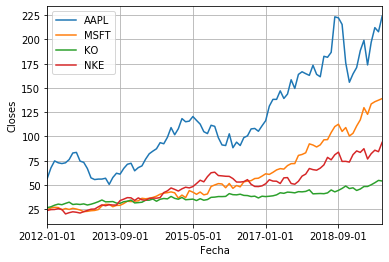

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

closes[['AAPL','MSFT','KO','NKE']].plot(grid=True)
plt.xlabel('Fecha')
plt.ylabel('Closes')

In [18]:
ret = closes.pct_change().dropna()
ret

,AAPL,MSFT,KO,NKE
Date,,,,
2012-02-01,0.188311,0.074839,0.034503,0.037792
2012-03-01,0.105284,0.023074,0.059405,0.004818
2012-04-01,-0.025970,-0.007439,0.038764,0.035083
2012-05-01,-0.010702,-0.088382,-0.020833,-0.032984
2012-06-01,0.010853,0.054838,0.046300,-0.185876
2012-07-01,0.045822,-0.036613,0.040436,0.063454
2012-08-01,0.089200,0.045810,-0.074258,0.042956
2012-09-01,0.007102,-0.027997,0.014171,-0.021595
2012-10-01,-0.107600,-0.040995,-0.013110,-0.037193


Text(0, 0.5, 'Rendimientos Porcentuales')

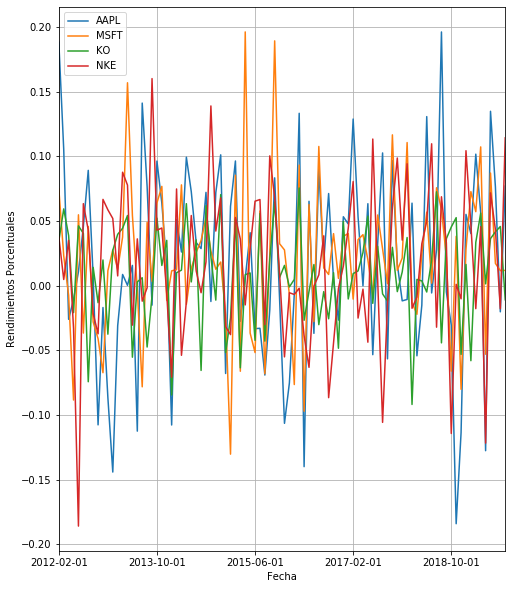

In [20]:
ret.plot(figsize=(8,10),grid=True)
plt.xlabel('Fecha')
plt.ylabel('Rendimientos Porcentuales')

In [22]:
ret_summary = pd.DataFrame(data={'Mean':ret.mean(),'Volatility':ret.std()},index=ret.columns)
ret_summary

,Mean,Volatility
AAPL,0.017811,0.075301
MSFT,0.020692,0.057852
KO,0.008505,0.038600
NKE,0.016839,0.058976


In [23]:
ret.cov()

,AAPL,MSFT,KO,NKE
AAPL,0.005670,0.001608,0.000560,0.000788
MSFT,0.001608,0.003347,0.000754,0.000686
KO,0.000560,0.000754,0.001490,0.000254
NKE,0.000788,0.000686,0.000254,0.003478


In [26]:
corr=ret.corr()
corr

,AAPL,MSFT,KO,NKE
AAPL,1.000000,0.369214,0.192702,0.177371
MSFT,0.369214,1.000000,0.337857,0.201156
KO,0.192702,0.337857,1.000000,0.111760
NKE,0.177371,0.201156,0.111760,1.000000


Los dos activos que ofrecen la mejor oportunidad para diversificar son **CocaCola(KO)** y **Nike (NKE)** ya que son los dos menos correlacionados.

**Punto 2 (15%).** Usando los datos que obtuvo para los **activos que seleccionó** en el punto anterior:

1. Construya la frontera de mínima varianza que representa las posibles combinaciones de portafolios que se pueden crear con los activos que **seleccionó en el primer punto**. Reportar los **rendimientos esperados y las volatilidades de estos portafolios (base mensual) en un DataFrame** (8%).

2. Encontrar los pesos del portafolio de mínima varianza. Reportar el **rendimiento esperado mensual y la volatilidad mensual del portafolio de mínima varianza** (7%).

**Activo 1:** KO   **Activo 2:** NKE

In [29]:
N = 101
w = np.linspace(0,1,N)
E1 = ret_summary.loc['KO','Mean']
E2 = ret_summary.loc['NKE','Mean']
# Volatilidades individuales
s1 = ret_summary.loc['KO','Volatility']
s2 = ret_summary.loc['NKE','Volatility']
# Correlacion
r12 = corr.loc['KO','NKE']
E1,E2,s1,s2,r12

(0.008504968654351342,
 0.016839006403775017,
 0.03860004315457088,
 0.058975712527372624,
 0.11175957369597901)

In [31]:
portKN = pd.DataFrame(data={'w':w,'Mean':w*E1+(1-w)*E2,'Volatility':((w*s1)**2+((1-w)*s2)**2+2*w*(1-w)*s1*s2*r12)**0.5})
portKN

,w,Mean,Volatility
0,0.00,0.016839,0.058976
1,0.01,0.016756,0.058430
2,0.02,0.016672,0.057888
3,0.03,0.016589,0.057347
4,0.04,0.016506,0.056810
5,0.05,0.016422,0.056275
6,0.06,0.016339,0.055744
7,0.07,0.016256,0.055215
8,0.08,0.016172,0.054689
9,0.09,0.016089,0.054166


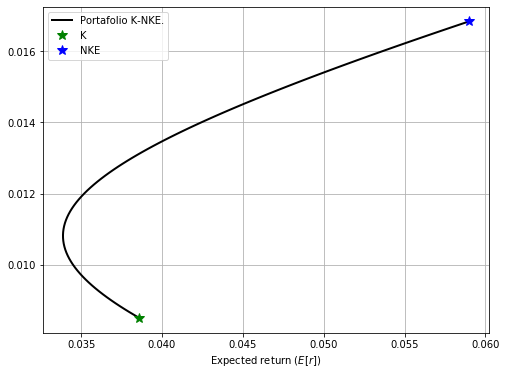

In [36]:
plt.figure(figsize=(8,6))
plt.plot(portKN['Volatility'],portKN['Mean'],'k',lw=2,label='Portafolio K-NKE.')
plt.plot(s1,E1,'g*',ms=10,label='K')
plt.plot(s2,E2,'b*',ms=10,label='NKE')
plt.xlabel('Volatility ($/sigma$)')
plt.xlabel('Expected return ($E[r]$)')
plt.legend(loc='best')
plt.grid()

In [38]:
def varianza(w,s1,s2,r12):
    return (w*s1)**2 + ((1-w)*s2)**2 +2*w*(1-w)*s1*s2*r12

In [39]:
w0=0.5
bnd = ((0,1),)

In [40]:
minvar = opt.minimize(fun=varianza,x0=w0,args=(s1,s2,r12),bounds=bnd)
minvar

      fun: array([0.00114763])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([8.67361738e-11])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 2
   status: 0
  success: True
        x: array([0.72292593])

In [42]:
w1= minvar['x']
w2=1-w1
E_minvar = w1*E1 + (w2)*E2
s_minvar = varianza (w1,s1,s2,r12)**0.5
w2,w1,E_minvar,s_minvar

(array([0.27707407]),
 array([0.72292593]),
 array([0.01081411]),
 array([0.03387662]))

**Respuesta:** El portafolio de mínima varianza se compone aproximadamente de 27.71% de acciones de CocaCola y 72.29% de acciones de Nike. El rendimiento esperado de este portafolio es de 1.08% con una volatilidad de 3.39%.

**Punto 3 (10%).** En este punto se usarán los mismos **activos que seleccionó** en el punto 1 con sus rendimientos esperados y volatilidades, solo que **el coeficiente de correlación entre sus rendimientos se supondrá de 0.5**.

1. Nuevamente, construya la frontera de mínima varianza para estos dos activos **con el nuevo supuesto de correlación**. Reportar **los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame** (5%).
2. Encontrar los pesos del portafolio de mínima varianza. Reportar el **rendimiento esperado mensual y la volatilidad mensual del portafolio de mínima varianza** (5%).

In [44]:
R12=0.5

In [46]:
portKN2 = pd.DataFrame(data={'w':w,'Mean':w*E1+(1-w)*E2,'Volatility':((w*s1)**2+((1-w)*s2)**2+2*w*(1-w)*s1*s2*R12)**0.5})
portKN2

,w,Mean,Volatility
0,0.00,0.016839,0.058976
1,0.01,0.016756,0.058580
2,0.02,0.016672,0.058186
3,0.03,0.016589,0.057794
4,0.04,0.016506,0.057404
5,0.05,0.016422,0.057016
6,0.06,0.016339,0.056631
7,0.07,0.016256,0.056247
8,0.08,0.016172,0.055866
9,0.09,0.016089,0.055487


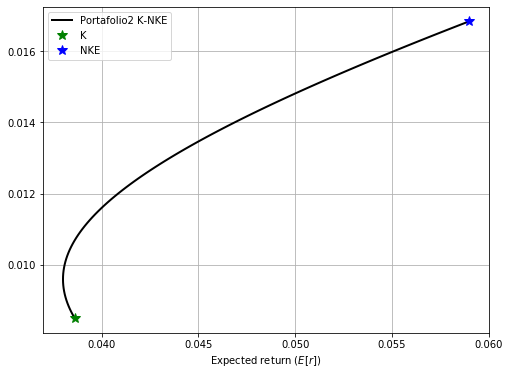

In [52]:
plt.figure(figsize=(8,6))
plt.plot(portKN2['Volatility'],portKN2['Mean'],'k',lw=2,label='Portafolio2 K-NKE')
plt.plot(s1,E1,'g*',ms=10,label='K')
plt.plot(s2,E2,'b*',ms=10,label='NKE')
plt.xlabel('Volatility ($/sigma$)')
plt.xlabel('Expected return ($E[r]$)')
plt.legend(loc='best')
plt.grid()

In [53]:
minvar2 = opt.minimize(fun=varianza,x0=w0,args=(s1,s2,R12),bounds=bnd)
minvar2

      fun: array([0.001444])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.74120351e-09])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 2
   status: 0
  success: True
        x: array([0.86932294])

In [54]:
W1= minvar2['x']
W2=1-W1
E_minvar2 = W1*E1 + (W2)*E2
s_minvar2 = varianza (W1,s1,s2,R12)**0.5
W1,W2,E_minvar2,s_minvar2

(array([0.86932294]),
 array([0.13067706]),
 array([0.00959404]),
 array([0.03800001]))

**Respuesta:** El portafolio de mínima varianza se compone aproximadamente de 86.94% de acciones de CocaCola y 13.06% de acciones de Nike. El rendimiento esperado de este portafolio es de 0.96% con una volatilidad de 3.8%.

**Punto 4 (10%).** 

1. Usando sus respuestas para los puntos 2 y 3, **grafique las dos fronteras encontradas en una sola gráfica**, además de los puntos correspondientes a los activos individuales, y de **los portafolios de mínima varianza para cada caso**, donde el eje $x$ es la volatilidad y el eje $y$ el rendimiento esperado. Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (5%).
2. Concluya acerca de la gráfica de las dos fronteras de mínima varianza. ¿Cuál provee más diversificación?, ¿cómo se diferencian?, **¿son diferentes los pesos de los dos portafolios de varianza mínima en cada caso?**, **¿cómo puede explicar esta diferencia/similitud?** (5%).

Text(0, 0.5, 'Rendimiento esperado ($E[r]$)')

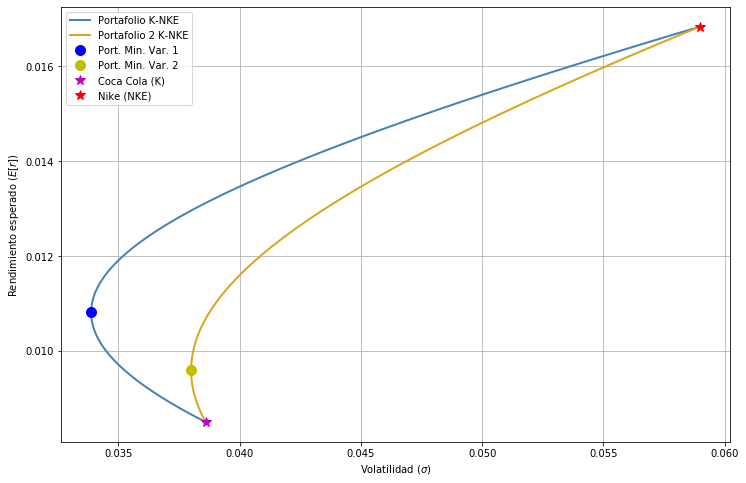

In [58]:
plt.figure(figsize=(12,8))
plt.plot(portKN['Volatility'], portKN['Mean'], 'steelblue',lw=2, label='Portafolio K-NKE')
plt.plot(portKN2['Volatility'], portKN2['Mean'], 'goldenrod',lw=2, label='Portafolio 2 K-NKE')
plt.plot(s_minvar, E_minvar, 'ob', ms=10, label='Port. Min. Var. 1')
plt.plot(s_minvar2, E_minvar2, 'oy', ms=10, label='Port. Min. Var. 2')
plt.plot(s1,E1,'m*',ms=10,label='Coca Cola (K)')
plt.plot(s2,E2,'r*',ms=10,label='Nike (NKE)')
plt.grid()
plt.legend()
plt.xlabel('Volatilidad ($\sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')

**Conclusión:** Podemos observar como el primer portafolio (azul) está más diversifivcado porque los activos tenían una correlación menor. Si vemos el portafolio de mínima varianza de ambas fronteras, vemos claramente que en el primer portafolio obtenemos mayor rendimiento con un menor riesgo lo que nos indica que está mejor diversificado.

Los pesos de los portafolios de mínima varianza son muy diferentes en ambas fronteras, en el portafolio 1 predominan las acciones de Nike mientras que en el segundo predominan las de Coca Cola, están practicamente invertidos, esto se da porque al estar más correlacionados la concavidad de la frontera es menos predominante por lo que los pesos son diferentes.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>